In [4]:
%load_ext autoreload
%autoreload 2
import os; import sys; sys.path.insert(0,'../')
import warnings
import pandas as pd
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)

import socceraction.spadl.api as spadl
import tqdm
import requests
import math
import zipfile

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
datafolder = "../data"
statsbombzip = os.path.join(datafolder,"statsbomb-open-data.zip")
statsbombroot = os.path.join(datafolder,"statsbomb-root")
statsbombdata =  os.path.join(datafolder,"statsbomb-root","open-data-master","data")

In [6]:
# Create data folder if it doesn't exist
if not os.path.exists(datafolder):
    os.mkdir(datafolder)
    print(f"Directory {datafolder} created ")

Directory ../data created 


In [7]:
url = "https://github.com/statsbomb/open-data/archive/master.zip"

# Streaming, so we can iterate over the response.
r = requests.get(url, stream=True)

# Total size in bytes.
total_size = int(r.headers.get("content-length", 0))
block_size = 1024 * 1024
wrote = 0
with open(statsbombzip, "wb") as f:
    datastream = tqdm.tqdm(
        r.iter_content(block_size),
        total=math.ceil(total_size // block_size),
        unit="MB",
        #unit_scale=True,
        #unit_divisor=1024
    )
    for data in datastream:
        wrote = wrote + len(data)
        f.write(data)
if total_size != 0 and wrote != total_size:
    print("ERROR, something went wrong")

12733MB [00:40, 311.25MB/s]


In [8]:
with zipfile.ZipFile(statsbombzip, 'r') as zipObj:
    zipObj.extractall(statsbombroot)

os.listdir(statsbombdata)

['competitions.json', 'events', 'lineups', 'matches']

In [11]:
spadl.statsbombjson_to_statsbombh5(statsbomb_json,statsbomb_h5)

...Adding competitions to statsbomb.h5
...Adding matches to statsbomb.h5



...Adding players and teams to statsbomb.h5:  58%|████████████████████████████████████████████████████████████████████████▋                                                     | 363/629 [00:04<00:07, 35.30it/s]


...Adding players and teams to statsbomb.h5:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████▉                         | 504/629 [00:09<00:04, 25.01it/s]


...Adding players and teams to statsbomb.h5:  98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 618/629 [00:14<00:00, 20.72it/s]


converting events files to statsbomb.h5:   5%|██████▊                                                                                                                            | 33/629 [00:06<01:50,  5.37it/s]


converting events files to statsbomb.h5:  11%|██████████████▊                                                                                                                    | 71/629 [00:13<01:37,  5.73it/s]


converting events files to statsbomb.h5:  17%|██████████████████████▌                                                                                                           | 109/629 [00:20<01:46,  4.86it/s]


converting events files to statsbomb.h5:  23%|██████████████████████████████▍                                                                                                   | 147/629 [00:27<01:22,  5.82it/s]


converting events files to statsbomb.h5:  29%|██████████████████████████████████████▏                                                                                           | 185/629 [00:38<02:22,  3.11it/s]


converting events files to statsbomb.h5:  35%|██████████████████████████████████████████████                                                                                    | 223/629 [00:52<02:23,  2.83it/s]


converting events files to statsbomb.h5:  41%|█████████████████████████████████████████████████████▉                                                                            | 261/629 [01:06<01:55,  3.20it/s]


converting events files to statsbomb.h5:  48%|█████████████████████████████████████████████████████████████▊                                                                    | 299/629 [01:18<01:43,  3.19it/s]


converting events files to statsbomb.h5:  54%|█████████████████████████████████████████████████████████████████████▋                                                            | 337/629 [01:30<01:40,  2.90it/s]


converting events files to statsbomb.h5:  60%|█████████████████████████████████████████████████████████████████████████████▌                                                    | 375/629 [01:42<01:16,  3.33it/s]


converting events files to statsbomb.h5:  66%|█████████████████████████████████████████████████████████████████████████████████████▎                                            | 413/629 [01:54<01:14,  2.91it/s]


converting events files to statsbomb.h5:  72%|█████████████████████████████████████████████████████████████████████████████████████████████▏                                    | 451/629 [02:08<00:57,  3.09it/s]


converting events files to statsbomb.h5:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████                             | 489/629 [02:20<00:42,  3.33it/s]


converting events files to statsbomb.h5:  84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                     | 527/629 [02:33<00:34,  2.93it/s]


converting events files to statsbomb.h5:  90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊             | 565/629 [02:49<00:24,  2.59it/s]


converting events files to statsbomb.h5:  96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 603/629 [03:00<00:07,  3.47it/s]


converting events files to statsbomb.h5: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 629/629 [03:09<00:00,  2.99it/s]

In [12]:
tablenames = ["matches","players","teams","competitions"]
tables = {name : pd.read_hdf(statsbomb_h5,key=name) for name in tablenames}

match_id = tables["matches"].match_id[0]
tables["events"] = pd.read_hdf(statsbomb_h5,f"events/match_{match_id}")

for k,df in tables.items():
    print("#",k)
    print(df.columns,"\n")

# matches
Index(['away_score', 'away_team_gender', 'away_team_group', 'away_team_id',
       'away_team_name', 'competition_id', 'competition_name', 'country_name',
       'data_version', 'home_score', 'home_team_gender', 'home_team_group',
       'home_team_id', 'home_team_name', 'id', 'kick_off', 'last_updated',
       'managers', 'match_date', 'match_id', 'match_status', 'match_week',
       'name', 'season_id', 'season_name', 'shot_fidelity_version',
       'xy_fidelity_version'],
      dtype='object') 

# players
Index(['country_id', 'country_name', 'extra', 'jersey_number', 'player_id',
       'player_name', 'player_nickname'],
      dtype='object') 

# teams
Index(['team_id', 'team_name'], dtype='object') 

# competitions
Index(['competition_gender', 'competition_id', 'competition_name',
       'country_name', 'match_available', 'match_updated', 'season_id',
       'season_name'],
      dtype='object') 

# events
Index(['counterpress', 'duration', 'extra', 'id', 'index', 'locati

In [13]:
spadl.statsbombh5_to_spadlh5(statsbomb_h5,spadl_h5)

...Converting matches to games
...Converting players
...Converting teams
...Converting competitions
...Inserting actiontypes
...Inserting bodyparts
...Inserting results
...Computing playergames (minutes played in each game



 14%|███████████████████████▊                                                                                                                                                  | 88/628 [00:05<00:34, 15.65game/s]


 28%|███████████████████████████████████████████████                                                                                                                          | 175/628 [00:10<00:30, 14.96game/s]


 42%|██████████████████████████████████████████████████████████████████████▏                                                                                                  | 261/628 [00:16<00:21, 17.42game/s]


 56%|██████████████████████████████████████████████████████████████████████████████████████████████▏                                                                          | 350/628 [00:22<00:26, 10.66game/s]


 65%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                          | 410/628 [00:28<00:23,  9.23game/s]


 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                           | 467/628 [00:35<00:18,  8.79game/s]


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                  | 558/628 [00:41<00:04, 15.92game/s]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 628/628 [00:47<00:00, 12.84game/s]

...Converting events to actions



  6%|██████████                                                                                                                                                                | 37/628 [00:13<03:47,  2.60game/s]


 12%|████████████████████▎                                                                                                                                                     | 75/628 [00:29<03:28,  2.65game/s]


 18%|██████████████████████████████▍                                                                                                                                          | 113/628 [00:46<03:50,  2.23game/s]


 24%|████████████████████████████████████████▋                                                                                                                                | 151/628 [01:01<03:04,  2.58game/s]


 30%|██████████████████████████████████████████████████▊                                                                                                                      | 189/628 [01:16<02:55,  2.50game/s]


 36%|█████████████████████████████████████████████████████████████                                                                                                            | 227/628 [01:29<02:27,  2.72game/s]


 42%|███████████████████████████████████████████████████████████████████████▎                                                                                                 | 265/628 [01:43<02:07,  2.84game/s]


 48%|█████████████████████████████████████████████████████████████████████████████████▌                                                                                       | 303/628 [01:56<01:59,  2.72game/s]


 54%|███████████████████████████████████████████████████████████████████████████████████████████▊                                                                             | 341/628 [02:09<01:36,  2.97game/s]


 60%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                   | 379/628 [02:22<01:24,  2.94game/s]


 66%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                        | 417/628 [02:35<01:18,  2.69game/s]


 72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                              | 455/628 [02:48<01:10,  2.47game/s]


 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                    | 493/628 [03:07<01:01,  2.21game/s]


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                          | 531/628 [03:24<00:43,  2.25game/s]


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                | 569/628 [03:40<00:23,  2.55game/s]


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 607/628 [03:56<00:08,  2.34game/s]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 628/628 [04:04<00:00,  2.25game/s]

In [14]:
tablenames = ["games","players","teams","competitions","actiontypes","bodyparts","results"]
tables = {name : pd.read_hdf(spadl_h5,key=name) for name in tablenames}

game_id = tables["games"].game_id[0]
tables["actions"] = pd.read_hdf(spadl_h5,f"actions/game_{game_id}")

for k,df in tables.items():
    print("#",k)
    print(df.columns,"\n")

# games
Index(['away_score', 'away_team_gender', 'away_team_group', 'away_team_id',
       'away_team_name', 'competition_id', 'competition_name', 'country_name',
       'data_version', 'home_score', 'home_team_gender', 'home_team_group',
       'home_team_id', 'home_team_name', 'id', 'kick_off', 'last_updated',
       'managers', 'match_date', 'match_id', 'match_status', 'match_week',
       'name', 'season_id', 'season_name', 'shot_fidelity_version',
       'xy_fidelity_version', 'game_id'],
      dtype='object') 

# players
Index(['country_id', 'country_name', 'extra', 'jersey_number', 'player_id',
       'player_name', 'player_nickname'],
      dtype='object') 

# teams
Index(['team_id', 'team_name'], dtype='object') 

# competitions
Index(['competition_gender', 'competition_id', 'competition_name',
       'country_name', 'match_available', 'match_updated', 'season_id',
       'season_name'],
      dtype='object') 

# actiontypes
Index(['type_id', 'type_name'], dtype='object') 

# 

In [15]:
import socceraction.classification.features as fs
import socceraction.classification.labels as lab

In [18]:
spadl_h5 = "spadl-statsbomb.h5"
features_h5 = "features.h5"
labels_h5 = "labels.h5"
predictions_h5 = "predictions.h5"

In [19]:
games = pd.read_hdf(spadl_h5,"games")

In [22]:
games = games[games.competition_name == "Women's World Cup"]
print("nb of games:", len(games))

actiontypes = pd.read_hdf(spadl_h5, "actiontypes")
bodyparts = pd.read_hdf(spadl_h5, "bodyparts")
results = pd.read_hdf(spadl_h5, "results")

nb of games: 52


In [23]:

xfns = [fs.actiontype,
       fs.actiontype_onehot,
       fs.bodypart,
       fs.bodypart_onehot,
       fs.result,
       fs.result_onehot,
       fs.goalscore,
       fs.startlocation,
       fs.endlocation,
       fs.movement,
       fs.space_delta,
       fs.startpolar,
       fs.endpolar,
       fs.team,
       fs.time,
       fs.time_delta
      ]

for game in tqdm.tqdm(list(games.itertuples()),desc=f"Generating and storing features in {features_h5}"):
    actions = pd.read_hdf(spadl_h5,f"actions/game_{game.game_id}")
    actions = (
        actions.merge(actiontypes,how="left")
        .merge(results,how="left")
        .merge(bodyparts,how="left")
        #.sort_values(["period_id", "time_seconds", "timestamp"])
        .reset_index(drop=True)
    )
    gamestates = fs.gamestates(actions,3)
    gamestates = fs.play_left_to_right(gamestates,game.home_team_id)
    
    X = pd.concat([fn(gamestates) for fn in xfns],axis=1)
    X.to_hdf(features_h5,f"game_{game.game_id}")


Generating and storing features in features.h5:  71%|████████████████████████████████████████████████████████████████████████████████████████▉                                    | 37/52 [00:13<00:05,  2.82it/s]


Generating and storing features in features.h5: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 52/52 [00:18<00:00,  2.81it/s]

In [24]:
yfns = [lab.scores,lab.concedes,lab.goal_from_shot]

for game in tqdm.tqdm(list(games.itertuples()),desc=f"Computing and storing labels in {labels_h5}"):
    actions = pd.read_hdf(spadl_h5,f"actions/game_{game.game_id}")
    actions = (
        actions.merge(actiontypes,how="left")
        .merge(results,how="left")
        .merge(bodyparts,how="left")
        #.sort_values(["period_id", "time_seconds", "timestamp"])
        .reset_index(drop=True)
    )
    
    Y = pd.concat([fn(actions) for fn in yfns],axis=1)
    Y.to_hdf(labels_h5,f"game_{game.game_id}")


Computing and storing labels in labels.h5:  71%|████████████████████████████████████████████████████████████████████████████████████████████▌                                     | 37/52 [00:05<00:02,  6.11it/s]


Computing and storing labels in labels.h5: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 52/52 [00:08<00:00,  7.30it/s]

In [25]:
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)

import socceraction.classification.features as fs
import socceraction.classification.labels as lab

In [26]:
# 1. Select feature set X
xfns = [fs.actiontype,
       fs.actiontype_onehot,
       #fs.bodypart,
       fs.bodypart_onehot,
       fs.result,
       fs.result_onehot,
       fs.goalscore,
       fs.startlocation,
       fs.endlocation,
       fs.movement,
       fs.space_delta,
       fs.startpolar,
       fs.endpolar,
       fs.team,
       #fs.time,
       fs.time_delta,
       #fs.actiontype_result_onehot
      ]
nb_prev_actions = 1

# generate the columns of the selected features
Xcols = fs.feature_column_names(xfns,nb_prev_actions)
X = []
for game_id in tqdm.tqdm(games.game_id,desc="selecting features"):
    Xi = pd.read_hdf(features_h5,f"game_{game_id}")
    X.append(Xi[Xcols])
X = pd.concat(X)

# 2. Select label Y
Ycols = ["scores","concedes"]
Y = []
for game_id in tqdm.tqdm(games.game_id,desc="selecting label"):
    Yi = pd.read_hdf(labels_h5,f"game_{game_id}")
    Y.append(Yi[Ycols])
Y = pd.concat(Y)
print("X:", list(X.columns))
print("Y:", list(Y.columns))


selecting label: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 52/52 [00:00<00:00, 174.59it/s]

X: ['type_id_a0', 'type_pass_a0', 'type_cross_a0', 'type_throw_in_a0', 'type_freekick_crossed_a0', 'type_freekick_short_a0', 'type_corner_crossed_a0', 'type_corner_short_a0', 'type_take_on_a0', 'type_foul_a0', 'type_tackle_a0', 'type_interception_a0', 'type_shot_a0', 'type_shot_penalty_a0', 'type_shot_freekick_a0', 'type_keeper_save_a0', 'type_keeper_claim_a0', 'type_keeper_punch_a0', 'type_keeper_pick_up_a0', 'type_clearance_a0', 'type_bad_touch_a0', 'type_non_action_a0', 'type_dribble_a0', 'type_goalkick_a0', 'bodypart_foot_a0', 'bodypart_head_a0', 'bodypart_other_a0', 'result_id_a0', 'result_fail_a0', 'result_success_a0', 'result_offside_a0', 'result_owngoal_a0', 'result_yellow_card_a0', 'result_red_card_a0', 'goalscore_team', 'goalscore_opponent', 'goalscore_diff', 'start_x_a0', 'start_y_a0', 'end_x_a0', 'end_y_a0', 'dx_a0', 'dy_a0', 'movement_a0', 'start_dist_to_goal_a0', 'start_angle_to_goal_a0', 'end_dist_to_goal_a0', 'end_angle_to_goal_a0']
Y: ['scores', 'concedes']


In [28]:
%%time
# 3. train classifiers F(X) = Y
import xgboost

Y_hat = pd.DataFrame()
models = {}
for col in list(Y.columns):
    model = xgboost.XGBClassifier()
    model.fit(X,Y[col])
    models[col] = model

Wall time: 58.6 s


In [29]:
from sklearn.metrics import brier_score_loss, roc_auc_score

Y_hat = pd.DataFrame()
for col in Y.columns:
    Y_hat[col] = [p[1] for p in models[col].predict_proba(X)]
    print(f"Y: {col}")
    print(f"  Brier score: %.4f" % brier_score_loss(Y[col],Y_hat[col]))
    print(f"  ROC AUC: %.4f" % roc_auc_score(Y[col],Y_hat[col]))

Y: scores
  Brier score: 0.0100
  ROC AUC: 0.8446
Y: concedes
  Brier score: 0.0022
  ROC AUC: 0.9116


In [30]:

# get rows with game id per action
A = []
for game_id in tqdm.tqdm(games.game_id,"loading game ids"):
    Ai = pd.read_hdf(spadl_h5,f"actions/game_{game_id}")
    A.append(Ai[["game_id"]])
A = pd.concat(A)
A = A.reset_index(drop=True)

# concatenate action game id rows with predictions and save per game
grouped_predictions = pd.concat([A,Y_hat],axis=1).groupby("game_id")
for k,df in tqdm.tqdm(grouped_predictions,desc="saving predictions per game"):
    df = df.reset_index(drop=True)
    df[Y_hat.columns].to_hdf(predictions_h5,f"game_{int(k)}")


saving predictions per game: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 52/52 [00:02<00:00, 24.14it/s]

In [32]:
import socceraction.vaep as vaep

In [33]:
players = pd.read_hdf(spadl_h5,"players")
teams = pd.read_hdf(spadl_h5,"teams")
actiontypes = pd.read_hdf(spadl_h5, "actiontypes")
bodyparts = pd.read_hdf(spadl_h5, "bodyparts")
results = pd.read_hdf(spadl_h5, "results")

A = []
for game in tqdm.tqdm(list(games.itertuples())):
    actions = pd.read_hdf(spadl_h5,f"actions/game_{game.game_id}")
    actions = (
        actions.merge(actiontypes)
        .merge(results)
        .merge(bodyparts)
        .merge(players,"left",on="player_id")
        .merge(teams,"left",on="team_id")
        .sort_values(["period_id", "time_seconds", "timestamp"])
        .reset_index(drop=True)
    )
    preds = pd.read_hdf(predictions_h5,f"game_{game.game_id}")
    values = vaep.value(actions,preds.scores,preds.concedes)
    A.append(pd.concat([actions,preds,values],axis=1))
A = pd.concat(A).sort_values(["game_id","period_id", "time_seconds", "timestamp"]).reset_index(drop=True)
A.columns


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 52/52 [00:03<00:00, 15.22it/s]

Index(['game_id', 'period_id', 'time_seconds', 'timestamp', 'team_id',
       'player_id', 'start_x', 'start_y', 'end_x', 'end_y', 'type_id',
       'result_id', 'bodypart_id', 'action_id', 'type_name', 'result_name',
       'bodypart_name', 'country_id', 'country_name', 'extra', 'jersey_number',
       'player_name', 'player_nickname', 'team_name', 'scores', 'concedes',
       'offensive_value', 'defensive_value', 'vaep_value'],
      dtype='object')

In [34]:

A["player"] = A[["player_nickname","player_name"]].apply(lambda x: x[0] if x[0] else x[1],axis=1)

A["count"] = 1

A_ = A[A.type_name != "shot_penalty"] # ignore penalties
players = (
    A_[["player_id","team_name","player","vaep_value","count"]]
    .groupby(["player_id","team_name","player"])
    .sum()
    .reset_index()
)
players = players.sort_values("vaep_value",ascending=False)
players

,player_id,team_name,player,vaep_value,count
175,15623,Netherlands Women's,Vivianne Miedema,5.257158,493
43,5085,United States Women's,Alex Morgan,4.875153,345
335,25673,Thailand Women's,Suchawadee Nildhamrong,4.418277,201
13,4999,United States Women's,Lindsey Horan,3.920984,530
6,4961,Australia Women's,Samantha Kerr,3.909881,284
55,8298,United States Women's,Megan Rapinoe,3.897321,554
62,10125,France Women's,Wendie Renard,3.697266,602
61,10123,France Women's,Amandine Henry,3.637705,527
102,10220,Sweden Women's,Kosovare Asllani,3.631487,615
81,10178,England Women's,Lucy Bronze,3.575012,1078


In [35]:

pg = pd.read_hdf(spadl_h5,"player_games")
pg = pg[pg.game_id.isin(games.game_id)]
mp = pg[["player_id","minutes_played"]].groupby("player_id").sum().reset_index()
stats = players.merge(mp)
stats = stats[stats.minutes_played > 150]
stats["vaep_rating"] = stats.vaep_value * 90 / stats.minutes_played
stats.sort_values("vaep_value",ascending=False)

,player_id,team_name,player,vaep_value,count,minutes_played,vaep_rating
0,15623,Netherlands Women's,Vivianne Miedema,5.257158,493,683,0.692744
1,5085,United States Women's,Alex Morgan,4.875153,345,510,0.860321
2,25673,Thailand Women's,Suchawadee Nildhamrong,4.418277,201,283,1.405106
3,4999,United States Women's,Lindsey Horan,3.920984,530,388,0.909507
4,4961,Australia Women's,Samantha Kerr,3.909881,284,408,0.862474
5,8298,United States Women's,Megan Rapinoe,3.897321,554,434,0.808200
6,10125,France Women's,Wendie Renard,3.697266,602,504,0.660226
7,10123,France Women's,Amandine Henry,3.637705,527,504,0.649590
8,10220,Sweden Women's,Kosovare Asllani,3.631487,615,636,0.513890
9,10178,England Women's,Lucy Bronze,3.575012,1078,667,0.482385


In [90]:
final = A.loc[A['game_id'] == 69321]
final = final[~(final['vaep_value'] <= -0.25)] 
final = final[~(final['vaep_value'] >= 0.25)] 

In [86]:
final['vaep_value'] += abs(final['vaep_value'].min())

C:\Users\Reet Barik\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


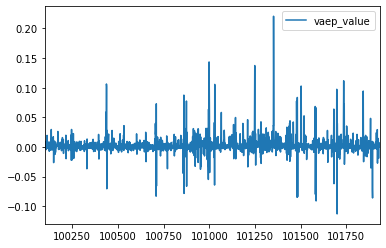

In [91]:
final.plot(y = 'vaep_value')

In [83]:
A['vaep_value'].min()

-1.5708020774745588